## A.I. Assignment 5

## Learning Goals

By the end of this lab, you should be able to:
* Get more familiar with tensors in pytorch 
* Create a simple multilayer perceptron model with pytorch
* Visualise the parameters


### Task

Build a fully connected feed forward network that adds two bits. Determine the a propper achitecture for this network (what database you use for this problem? how many layers? how many neurons on each layer? what is the activation function? what is the loss function? etc)

Create at least 3 such networks and compare their performance (how accurate they are?, how farst they are trained to get at 1 accuracy?)

Display for the best one the weights for each layer.


In [80]:
import torch
import torch.nn as nn
from collections import OrderedDict


In [81]:
# your code here
model1 = nn.Sequential(OrderedDict([
    ('hidden', nn.Linear(2, 2)),
    ('output', nn.Linear(2, 1))
]))

In [82]:
print(model1)

Sequential(
  (hidden): Linear(in_features=2, out_features=2, bias=True)
  (output): Linear(in_features=2, out_features=1, bias=True)
)


In [83]:
# your code here
X_train = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
print(X_train)


tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])


In [84]:
# your code here
Y_train = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
print(y_train)

tensor([[0.],
        [1.],
        [1.],
        [0.]])


In [85]:
# your code here
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model1.parameters(), lr=0.01)

In [86]:
# your code here
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs1 = model1(X_train)
    loss = criterion(outputs1, y_train)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print progress
    if (epoch+1) % 100 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))


Epoch [100/1000], Loss: 0.2658
Epoch [200/1000], Loss: 0.2504
Epoch [300/1000], Loss: 0.2500
Epoch [400/1000], Loss: 0.2500
Epoch [500/1000], Loss: 0.2500
Epoch [600/1000], Loss: 0.2500
Epoch [700/1000], Loss: 0.2500
Epoch [800/1000], Loss: 0.2500
Epoch [900/1000], Loss: 0.2500
Epoch [1000/1000], Loss: 0.2500


In [87]:
# your code here
# visualize the resuts

In [88]:
# your code here
# print model wights
for name, param in model1.named_parameters():
    if param.requires_grad:
        print(name, param.data)

hidden.weight tensor([[ 0.2215, -0.0095],
        [ 0.5441, -0.0233]])
hidden.bias tensor([-1.1135,  0.1588])
output.weight tensor([[-0.5066,  0.2063]])
output.bias tensor([-0.0969])


Epoch [1000/10000], Loss: 0.3475
Epoch [2000/10000], Loss: 0.3469
Epoch [3000/10000], Loss: 0.3466
Epoch [4000/10000], Loss: 0.3466
Epoch [5000/10000], Loss: 0.3466
Epoch [6000/10000], Loss: 0.3466
Epoch [7000/10000], Loss: 0.3466
Epoch [8000/10000], Loss: 0.3466
Epoch [9000/10000], Loss: 0.3466
Epoch [10000/10000], Loss: 0.3466
Test Accuracy: 75.00%


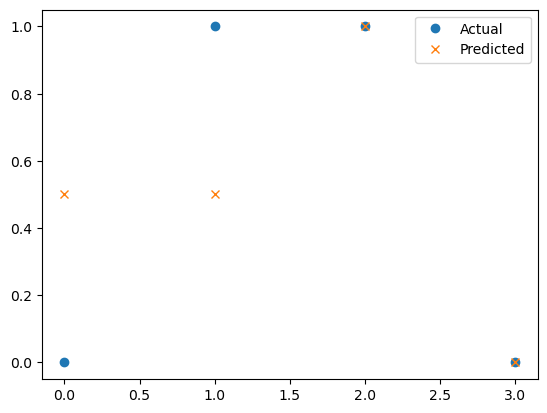

In [94]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from collections import OrderedDict

model2 = nn.Sequential(OrderedDict([
    ('fc1', nn.Linear(2, 3)),
    ('Relu1', nn.ReLU()),
    ('fc2', nn.Linear(3, 1)),
    ('sigmoid', nn.Sigmoid()) 
]))

# Define the loss function and optimizer
criterion2 = nn.BCELoss()
optimizer2 = torch.optim.Adam(model2.parameters(), lr=0.01)

# Adjust your training and test labels for binary classification
# Assuming the goal is to classify if the sum of inputs is odd (1) or even (0)
# Adjust these labels based on your actual classification task
y_train2 = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)  # Corrected shape

num_epochs = 10000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model2(X_train2)
    loss = criterion2(outputs, y_train2)
    
    # Backward and optimize
    optimizer2.zero_grad()
    loss.backward()
    optimizer2.step()
    
    if (epoch+1) % 1000 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# Note: Correct the test labels if necessary
y_test2 = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)  # Assuming the same task for testing

with torch.no_grad():
    outputs = model2(X_test2)
    predicted = (outputs >= 0.5).float()
    accuracy = (predicted == y_test2).sum().item() / len(y_test2)
    print('Test Accuracy: {:.2f}%'.format(accuracy * 100))

# Plot the predicted outputs against the actual outputs
plt.plot(y_test2.numpy(), 'o', label='Actual')
plt.plot(outputs.numpy(), 'x', label='Predicted')
plt.legend()
plt.show()


Epoch [1000/5000], Loss: 0.0066
Epoch [2000/5000], Loss: 0.0019
Epoch [3000/5000], Loss: 0.0009
Epoch [4000/5000], Loss: 0.0004
Epoch [5000/5000], Loss: 0.0002
Test Accuracy: 100.00%


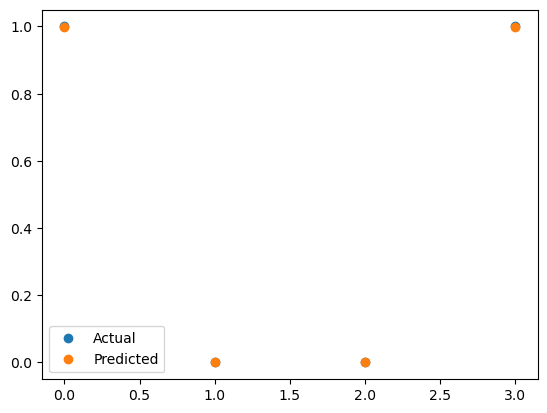

In [51]:
model3 = nn.Sequential(OrderedDict([
    ('fc1', nn.Linear(2, 5)),
    ('relu1', nn.ReLU()),
    ('fc2', nn.Linear(5, 3)),
    ('relu2', nn.ReLU()),
    ('fc3', nn.Linear(3, 1)),
    ('sigmoid', nn.Sigmoid())
]))

# Define the loss function and optimizer
criterion3 = nn.BCELoss()
optimizer3 = torch.optim.Adam(model3.parameters(), lr=0.01)

# Train the network
X_train3 = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y_train3 = torch.tensor([[1], [0], [0], [1]], dtype=torch.float32)

num_epochs = 5000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model3(X_train3)
    loss = criterion2(outputs, y_train3)
    
    # Backward and optimize
    optimizer3.zero_grad()
    loss.backward()
    optimizer3.step()
    
    # Print the loss every 1000 epochs
    if (epoch+1) % 1000 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# Evaluate the network on the test set
X_test3 = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y_test3 = torch.tensor([[1], [0], [0], [1]], dtype=torch.float32)

with torch.no_grad():
    outputs = model3(X_test3)
    predicted = (outputs >= 0.5).int()
    accuracy = (predicted == y_test3).sum().item() / predicted.shape[0]
    print('Test Accuracy: {:.2f}%'.format(accuracy * 100))

outputs3 = model3(X_test3).detach().numpy()

# Plot the predicted outputs against the actual outputs
plt.plot(y_test3.numpy(), 'o', label='Actual')
plt.plot(outputs3, 'o', label='Predicted')
plt.legend()
plt.show()